<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP3/TP3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Clasificadores no paramétricos

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar aplicativos que permitan dar solvencia a los problemas propuestos en la materia.
## Objetivos Específicos
*   Analizar estadísticamente el comportamiento de los valores descritos en los dataset propuestas.
*   Mediante el umbral proponer un clasificador de mínimo error utilizando la curva ROC.
*   Visualización de resultados

###Problema
**Ejercicio 1** Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia)
 Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y 
también cambiando centroide y covariancia de las clases.
  *   ¿Cambia mucho si el dataset tiene más dimensiones?


###Solución
Se plantea posibles soluciones, para el primer problema se desarrolla un aplicativo que genera 2 dataset de distribución normal, la media de la distribución, la desviación estándar y el tamaño de la tupla son seleccionadas por el usuario; se concatena y ordena para posterior obtener un clasificador K-NN.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [2]:
#Función norm_dist: Retorna 2 dataset con distribución normal 
def norm_dist(loc_1, scale_1, size_1, loc_2, scale_2, size_2):
    size_1 = int(size_1/2)
    size_2= int(size_2/2)
    A_dis = np.random.normal(loc_1,scale_1,size_1)                      
    B_dis = np.random.normal(loc_2,scale_2,size_2)
    At = np.around(np.random.uniform(1, 5, size=50),size_1)
    At2 = np.around(np.random.uniform(1, 5, size=50),size_2)

    A_df = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_1))
    A_df['Valor'] = A_dis
    A_df['Etiqueta'] = 'A'
    A_df['Atributo'] = At

    B_df = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_1))
    B_df['Etiqueta'] = 'B'
    B_df['Valor'] = A_dis
    B_df['Atributo'] = At2

    df1 = pd.concat([A_df, B_df])

    A_df1 = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_2))
    A_df1['Valor'] = B_dis
    A_df1['Etiqueta'] = 'C'
    A_df1['Atributo'] = At

    B_df1 = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_2))
    B_df1['Etiqueta'] = 'D'
    B_df1['Valor'] = B_dis
    B_df1['Atributo'] = At2

    df2 = pd.concat([A_df1, B_df1])

    return df1, df2

In [3]:
#@title Seleccione los parámetros para la distribución normal Dataset 1 { run: "auto" }
loc_1 = 30 #@param {type:"slider", min:30, max:60, step:5}
scale_1 = 10 #@param {type:"slider", min:1, max:10, step:1}
size_1 = 100 #@param {type:"slider", min:50, max:150, step:25}

In [4]:
#@title Seleccione los parámetros para la distribución normal Dataset 2 { run: "auto" }
loc_2 = 40 #@param {type:"slider", min:40, max:80, step:5}
scale_2 = 10 #@param {type:"slider", min:0, max:10, step:2}
size_2 = 100 #@param {type:"slider", min:50, max:150, step:25}

In [5]:
dataset1, dataset2 = norm_dist (loc_1, scale_1, size_1, loc_2, scale_2, size_2)
#Función describe, retorna parámetros como: percentiles, desviación STD, media, número de datos
dataset1.describe()

,Valor,Atributo
count,100.000000,100.000000
mean,30.395882,3.019893
std,10.089085,1.237184
min,10.861581,1.004179
25%,22.055360,1.881421
50%,30.090554,3.145486
75%,37.548166,4.021358
max,56.706421,4.938607


In [6]:
dataset2.describe()

,Valor,Atributo
count,100.000000,100.000000
mean,40.298909,3.019893
std,8.383181,1.237184
min,22.258424,1.004179
25%,32.838995,1.881421
50%,40.013468,3.145486
75%,46.326268,4.021358
max,56.409525,4.938607


In [7]:
dataset1.sample(100)

,Etiqueta,Valor,Atributo
2,A,21.444064,4.300267
43,B,25.013029,1.584069
7,A,24.916087,2.873784
6,A,38.972853,3.200396
45,A,39.502186,1.048059
...,...,...,...
29,B,32.674753,2.715680
6,B,38.972853,3.940667
18,A,15.155710,1.571319
48,B,33.562632,4.820861


In [8]:
dataset2.sample(10)

,Etiqueta,Valor,Atributo
41,D,48.135739,2.912380
29,D,32.127865,2.715680
10,C,35.149931,1.176272
41,C,48.135739,4.010827
38,C,32.059721,3.735121
42,C,35.936566,1.955735
34,C,31.367175,2.836654
28,D,41.851005,4.938607
25,D,40.114778,1.049624
0,C,56.409525,2.971379


In [9]:
#Concatenación de los dataset
df = pd.concat([dataset1, dataset2])

In [10]:
#Se ordenan los datos
df_ord = df
df_ord.sort_values('Valor', inplace=True, ignore_index=True)
df_ord

,Etiqueta,Valor,Atributo
0,A,10.861581,2.756191
1,B,10.861581,3.495130
2,B,14.179665,3.579180
3,A,14.179665,2.974040
4,A,15.155710,1.571319
...,...,...,...
195,C,55.908027,1.300764
196,D,56.409525,1.388890
197,C,56.409525,2.971379
198,A,56.706421,4.426042


In [11]:
print("forma del dataset")
print(df_ord.Valor.shape)

forma del dataset
(200,)


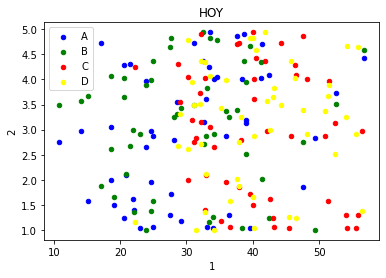

In [12]:
fig = df_ord[df_ord.Etiqueta == 'A'].plot(kind='scatter', x='Valor', y='Atributo', color='blue', label='A')
df_ord[df_ord.Etiqueta == 'B'].plot(kind='scatter', x='Valor', y='Atributo', color='green', label='B', ax=fig)
df_ord[df_ord.Etiqueta == 'C'].plot(kind='scatter', x='Valor', y='Atributo', color='red', label='C', ax=fig)
df_ord[df_ord.Etiqueta == 'D'].plot(kind='scatter', x='Valor', y='Atributo', color='yellow', label='D', ax=fig)
fig.set_xlabel('1')
fig.set_ylabel('2')
fig.set_title('HOY')
plt.show()

·Clasificador K-NN

In [13]:
#K_NN 1 vecino
X = np.array(df_ord.drop(['Etiqueta'], 1))
y = np.array(df_ord['Etiqueta'])
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
Y_pred = knn.predict(X)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X, y)))
print(knn.predict_proba([[41,2.6]]))
print(knn.predict([[41,2.6]]))

Precisión Vecinos más Cercanos: 1.0
[[0. 1. 0. 0.]]
['B']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [41]:
#K_NN 10 vecinos
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
Y_pred = knn.predict(X)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X, y)))
print(knn.predict_proba([[32,2.6]]))
print(knn.predict([[32,2.6]]))

Precisión Vecinos más Cercanos: 0.435
[[0.1 0.2 0.4 0.3]]
['C']


Proceso de entrenamiento

In [54]:
#@title Seleccione el procentaje de entrenamiento { run: "auto" }
test_size1 = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
X = np.array(df_ord.drop(['Etiqueta'], 1))
y = np.array(df_ord['Etiqueta'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size1)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 100 datos para entrenamiento y 100 datos para prueba


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
#@title Seleccione la cantidad de vecinos para K-NN { run: "auto" }
n_neighbors = 10 #@param {type:"slider", min:1, max:20, step:1}

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X, y)))
print(knn.predict_proba([[32,2.6]]))
print(knn.predict([[32,2.6]]))

Precisión Vecinos más Cercanos: 0.345
[[0.1 0.2 0.2 0.5]]
['D']


In [59]:
precision = precision_score(y_test, Y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, Y_pred, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test, Y_pred, average='weighted')
print('F-Measure: %.3f' % score)


Precision: 0.260
Recall: 0.260
F-Measure: 0.246
